In [1]:
## Getting the imports out of the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
##reading our file
def read_file(file_name):
    df_raw = pd.read_csv(file_name)
    return df_raw





In [3]:
## taking a look at our data
df_raw = read_file('raw.csv')
df_raw.head(10)

,Gas_consumption,Electricity_consumption,Water_consumption,Self_Storage_BuildingType,Industrial_BuildingType,Service_BuildingType,Office_BuildingType,Parking_BuildingType,Warehouse_BuildingType,Recreation_BuildingType,...,OfficeArea_ZipCode,BldgArea_ZipCode,BuildingAge,Occupancy,NumberofBuilding_Complex,Energy_Star_Score,Heating_dd,Cooling_dd,GHG,GFA(ft2)
0,1478.828178,131.207333,8024.477392,0,0,0,0,0,0,0,...,22148.259670,22148.259670,35,100,1,22,4496,1544,2020.5,304071
1,1499.686546,129.076134,10532.824790,0,0,0,0,0,0,0,...,32812.914290,32812.914290,26,100,1,74,3978,1732,2048.3,387919
2,1448.658038,267.355106,13965.492160,0,0,0,0,0,0,0,...,206.071429,206.071429,41,100,1,58,4496,1544,2853.9,172268
3,1493.735250,117.012715,13146.196460,0,0,0,0,0,0,0,...,5774.424490,5774.424490,46,95,1,1,4496,1544,2047.9,221100
4,1483.810344,189.831475,10905.349380,0,0,0,0,0,0,0,...,17792.494120,17792.494120,15,100,1,4,4496,1544,2256.7,248919
5,1466.458379,202.400995,15107.840090,0,0,0,0,0,0,0,...,32529.209040,32529.209040,53,100,1,17,4496,1544,2342.3,392966
6,1461.425610,153.341099,15098.568780,0,0,0,0,0,0,0,...,22244.818820,22244.818820,58,100,1,48,3978,1732,2154.3,421000
7,1458.256959,42.890484,11265.486880,0,0,0,0,0,0,0,...,35586.974520,35586.974520,54,95,1,48,3978,1732,1553.1,253490
8,1460.685964,169.600876,5803.996841,0,0,0,0,0,0,0,...,26279.508770,26279.508770,10,100,1,4,3978,1732,2241.7,304209
9,1456.707057,177.598914,6208.667054,0,0,0,0,0,0,0,...,26279.508770,26279.508770,10,100,1,4,4496,1544,2176.0,304209


In [4]:
### lets see the threshold if we use normal univariate z-score cut off
threshold = df_raw['Water_consumption'].mean() + 3 * df_raw['Water_consumption'].std()

# Create a new DataFrame containing values above the threshold
df_outliers_univar = df_raw[df_raw['Water_consumption'] > threshold]

# Print the threshold in a pretty way
print(f"Threshold for outliers (mean + 3 * std): {threshold:.2f}")

# Display the first few rows of df_outliers_univar
print(f"Number of datapoints flagged as outliers: {df_outliers_univar.shape[0]} ")
print()



Threshold for outliers (mean + 3 * std): 12850.78
Number of datapoints flagged as outliers: 129 



### Let's visualize our outliers using univariate outlier analysis

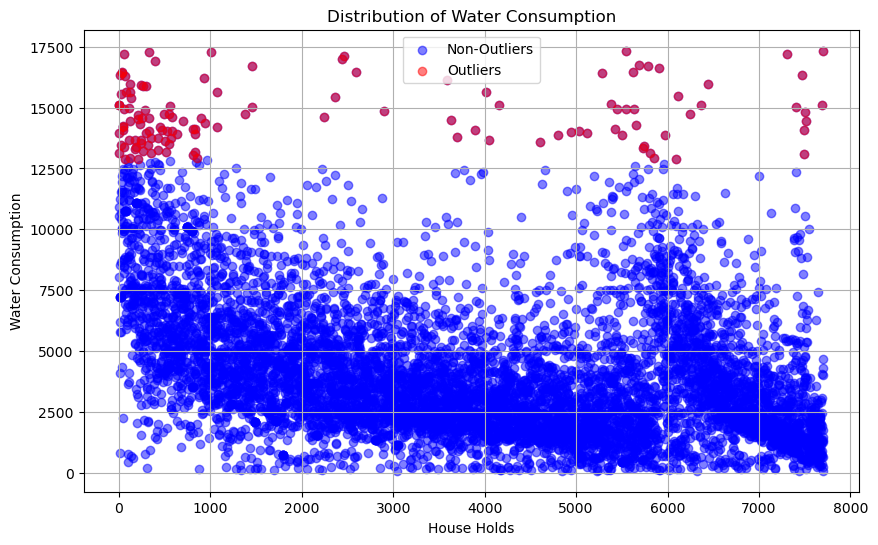

In [5]:

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot all data points in blue
plt.scatter(range(len(df_raw)), df_raw['Water_consumption'], marker='o', color='b', alpha=0.5, label='Non-Outliers')

# Plot data points in df_outliers_univar in red
plt.scatter(df_outliers_univar.index, df_outliers_univar['Water_consumption'], marker='o', color='r', alpha=0.5, label='Outliers')

# Add labels and title
plt.xlabel('House Holds')
plt.ylabel('Water Consumption')
plt.title('Distribution of Water Consumption')

# Show a legend to differentiate between outliers and non-outliers
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Next, let's try and detect outliers of water consumption in relation to gas consumption

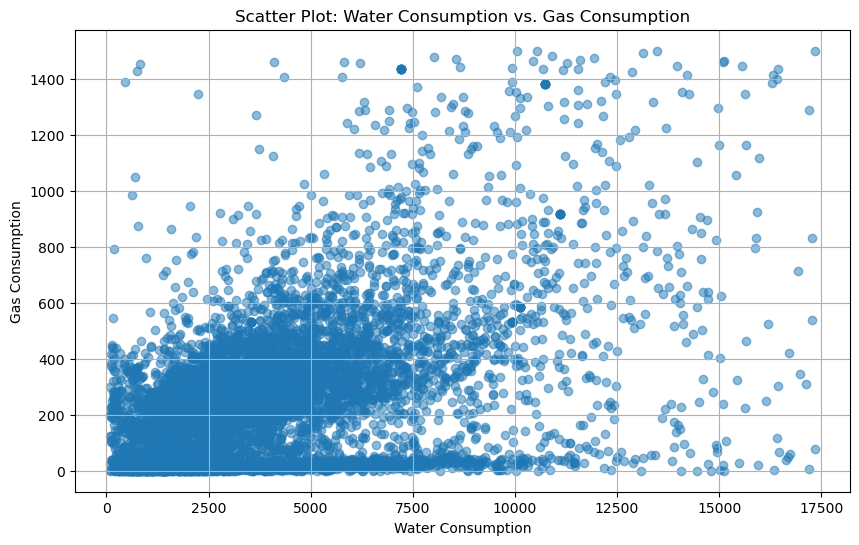

In [6]:
# Extract the columns for the scatter plot
water_consumption = df_raw['Water_consumption']
gas_consumption = df_raw['Gas_consumption']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(water_consumption, gas_consumption, alpha=0.5)  # alpha controls transparency

# Set plot labels and title
plt.xlabel('Water Consumption')
plt.ylabel('Gas Consumption')
plt.title('Scatter Plot: Water Consumption vs. Gas Consumption')

# Show the plot
plt.grid(True)
plt.show()

### At a first glance, we might want to consider points at the top right and bottom right as outliers. The intuition behind this is that points that consume a lot of water without consuming an appropriate amount of gas gives us a hint about potential misuse or leakage of water. 

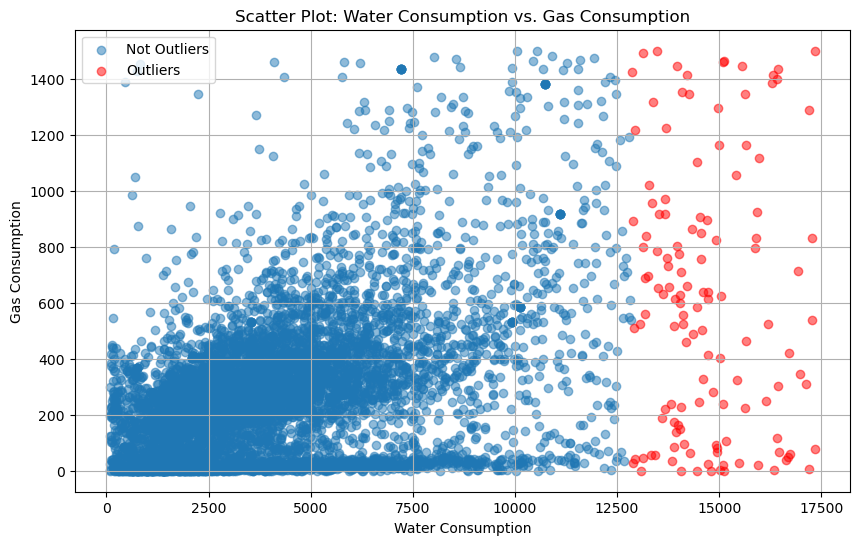

In [7]:
water_consumption = df_raw['Water_consumption']
gas_consumption = df_raw['Gas_consumption']

# Create a scatter plot with points not in df_outliers
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(
    water_consumption[~df_raw.index.isin(df_outliers_univar.index)],
    gas_consumption[~df_raw.index.isin(df_outliers_univar.index)],
    alpha=0.5,
    label='Not Outliers',  # Label for non-outliers points
)

# Create a scatter plot with points in df_outliers (colored in red)
plt.scatter(
    water_consumption[df_raw.index.isin(df_outliers_univar.index)],
    gas_consumption[df_raw.index.isin(df_outliers_univar.index)],
    alpha=0.5,
    color='red',  # Color for outliers points
    label='Outliers',  # Label for outliers points
)

# Set plot labels and title
plt.xlabel('Water Consumption')
plt.ylabel('Gas Consumption')
plt.title('Scatter Plot: Water Consumption vs. Gas Consumption')

# Show a legend to differentiate between outliers and non-outliers
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### As we can see the univariate analysis acted as more of a loose canon, it flagged anything to the right of the graph without taking into consideration the gas consumption, let's see how we can improve this and extract outliers that consume more water than what their gas consumption would entale. This mathmatically approximates itself to flagging points that are beneath the y = x and somewhat away from it as well.

# Let's see if we can do better using Random Forest Regression

In [8]:
def split_X_y(df,target_label):
    X = df.drop(target_label, axis=1)
    y = df[target_label]
    return X,y

In [9]:
X,y = split_X_y(df_raw,'Water_consumption')


In [10]:
def train_randomforest_regerssor(X,y):


    # Split the dataset into training set and test set
    

   # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    # Predict the water consumption on test set
    y_pred = model.predict(X_scaled)

    # Calculate the residuals
    residuals = y - y_pred

    importances = model.feature_importances_

    # Create a dataframe for visualization
    importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

    # Sort the dataframe by importance
    feature_importances = importances_df.sort_values(by='Importance', ascending=False)

    
    return residuals,feature_importances

In [11]:
def find_outlies_z_score(df,residuals,z_score_cut_off):
    # Identify buildings with residuals more than 3 standard deviations above the mean
    residuals_mean = residuals.mean()
    residuals_std = residuals.std()
    outliers = df[residuals > residuals_mean + z_score_cut_off * residuals_std]
    return outliers

In [12]:
## For future optimization, we can remove columns that have zero feature imporatnce
residuals,feature_importance = train_randomforest_regerssor(X,y)
feature_importance

,Feature,Importance
0,Gas_consumption,0.263884
28,GHG,0.168543
29,GFA(ft2),0.081651
17,Median_Income,0.061368
22,BuildingAge,0.057680
1,Electricity_consumption,0.053358
15,More60_AgePercentage,0.053081
14,Under9_AgePercentage,0.051969
16,Female_Percentage,0.042874
25,Energy_Star_Score,0.039591


In [13]:
## get the mean of the entire dataset
mean_total = df_raw['Water_consumption'].mean()

In [14]:
##get the number of outliers detected
df_outliers = find_outlies_z_score(df_raw,residuals,3)
num_outliers = df_outliers.shape


In [15]:
## mean water consumption of outlier households
mean_outliers= df_outliers['Water_consumption'].mean()

In [16]:


# Reset the index of df_outliers to ensure consistent indexing
df_outliers_reset = df_outliers.reset_index(drop=True)

# Use the index difference to select non-outlier rows from df_all_rows
df_no_outliers = df_raw.drop(df_outliers_reset.index, axis=0)

# df_no_outliers now contains all rows except the outliers

## print mean of non outliers
mean_no_outliers = df_no_outliers['Water_consumption'].mean()

In [17]:
print(f"Number of outliers detected: {num_outliers}")
print(f"Mean water consumption of entire dataset: {mean_total}")
print(f"Mean water consumption of outlier households: {mean_outliers}")
print(f"Mean water consumption without outliers: {mean_no_outliers}")

Number of outliers detected: (112, 31)
Mean water consumption of entire dataset: 4186.424509171726
Mean water consumption of outlier households: 13340.236643142856
Mean water consumption without outliers: 4102.791305791302


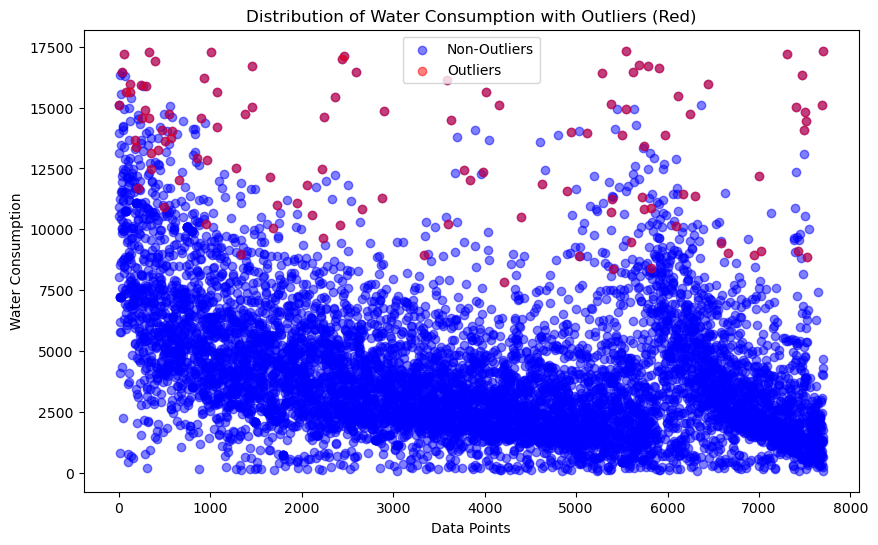

In [18]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames df_raw and df_outliers
# Replace 'water_consumption' with the actual column name if it's different

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Scatter plot for non-outliers (color='blue')
plt.scatter(
    range(len(df_raw)),  # x-values for non-outliers
    df_raw['Water_consumption'],  # y-values for non-outliers
    marker='o',
    color='blue',
    alpha=0.5,
    label='Non-Outliers'
)

# Scatter plot for outliers from df_outliers (color='red')
plt.scatter(
    df_outliers.index,  # x-values for outliers from df_outliers
    df_outliers['Water_consumption'],  # y-values for outliers from df_outliers
    marker='o',
    color='red',
    alpha=0.5,
    label='Outliers'
)

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Water Consumption')
plt.title('Distribution of Water Consumption with Outliers (Red)')

# Show a legend to differentiate between non-outliers and outliers
plt.legend()

# Show the plot
plt.show()


### We immediately can notice that we are flagging low consumers of water as anomalous, while allowing  some points that are high in consumption to not be flagged.

### let's investigate this further and  revisit the graph we drew earlier for the relation between water consumption and gas consumption

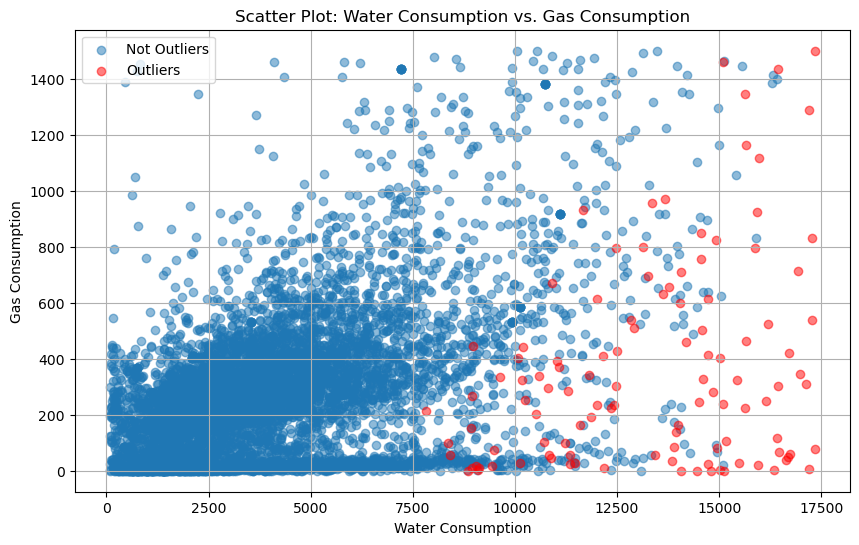

In [19]:
water_consumption = df_raw['Water_consumption']
gas_consumption = df_raw['Gas_consumption']

# Create a scatter plot with points not in df_outliers
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(
    water_consumption[~df_raw.index.isin(df_outliers.index)],
    gas_consumption[~df_raw.index.isin(df_outliers.index)],
    alpha=0.5,
    label='Not Outliers',  # Label for non-outliers points
)

# Create a scatter plot with points in df_outliers (colored in red)
plt.scatter(
    water_consumption[df_raw.index.isin(df_outliers.index)],
    gas_consumption[df_raw.index.isin(df_outliers.index)],
    alpha=0.5,
    color='red',  # Color for outliers points
    label='Outliers',  # Label for outliers points
)

# Set plot labels and title
plt.xlabel('Water Consumption')
plt.ylabel('Gas Consumption')
plt.title('Scatter Plot: Water Consumption vs. Gas Consumption')

# Show a legend to differentiate between outliers and non-outliers
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### It seems our Random forest regressor has flagged people with high water consumption and gas consumption as outliers. More interstingly, it flagged people with high water consumption but low gas consumption as outliers as well (bottom right points). This is the behaviour we set out to achieve in the beginning! flagging people who consume more water than their living context would make us think!

### As you can see we are getting a lot more outliers than univariate outlier analysis, this means a lot of households are overconsuming given the parameters of their household. This helps us evolve the  meaning of overconsumption of water based on each households needs.